# SCDAA PROJECT

## Setup

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
from numpy.polynomial.hermite_e import hermefit, hermeval
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


## Question 1

In [2]:
def coeffsForCondiExp(X,Y,hermiteOrder):
    '''
    Return the coefficients of a HermiteE series of degree deg that is the least squares
    fit to the data values y given at points x. If y is 1-D the returned coefficients
    will also be 1-D. If y is 2-D multiple fits are done, one for each column of y, 
    and the resulting coefficients are stored in the corresponding columns of a 2-D 
    return. 
    '''
    beta = hermefit(X,Y,hermiteOrder)
  
    return beta

def approxCondExp(X,beta):
    '''
    Evaluate a hermiteE series at point X
    '''
    condExp =  hermeval(X, beta)

    return condExp

def plot_condExp(X,Y, Y_hat, table = False):
    '''
    '''
    df = pd.DataFrame({'y': Y, 'y_hat':Y_hat, 'error': Y-Y_hat}, columns = ['y', 'y_hat', 'error'])
    error = Y-Y_hat
    rmse = mean_squared_error(Y, Y_hat, squared=False)

    plt.figure(figsize=(12, 6))    
    plt.subplot(121)
    sns.lineplot(x= X, y= Y, color="blue", label= 'True data')
    sns.scatterplot(x= X, y= Y_hat, color = 'red', s = 50, label= 'Fit data').set_title("Fit plot")
    
    plt.subplot(122)
    sns.scatterplot(x= X, y= error).set_title("Residual plot")
    
    plt.subplots_adjust(left=0.0)
    
    #plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
    plt.legend()
    plt.suptitle("RMSE = " + str(round(rmse, 4)), fontsize=16)
    plt.show()

    if table == True:
        return df

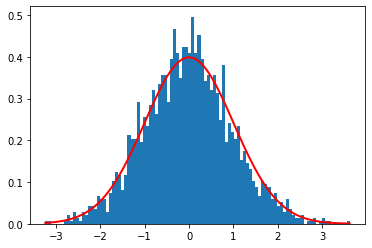

In [3]:
mu, sigma = 0, 1.0
y = np.random.normal(mu,sigma,2000)

count, bins, ignored = plt.hist(y, 100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


No handles with labels found to put in legend.


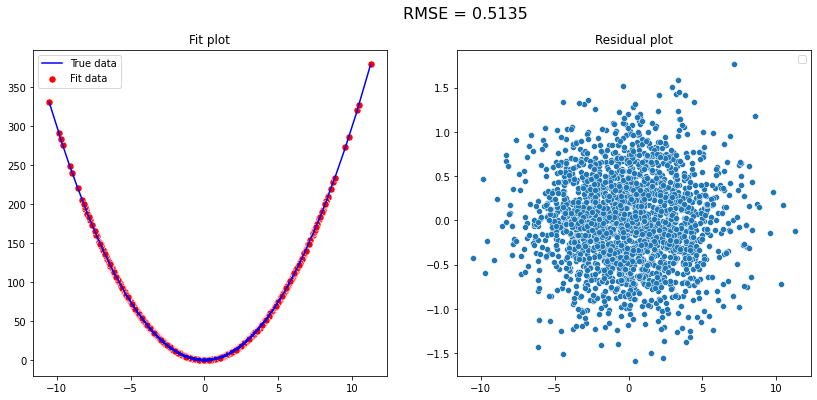

,y,y_hat,error
0,79.635995,79.678636,-0.042640
1,14.691464,16.247359,-1.555895
2,4.142822,4.569430,-0.426608
3,11.757396,11.660059,0.097337
4,63.486056,63.524590,-0.038533
...,...,...,...
1995,50.893981,51.225013,-0.331032
1996,-0.841935,-0.007151,-0.834784
1997,53.175855,53.708171,-0.532317
1998,11.838675,11.970830,-0.132156


In [4]:
# Set test samples, create X, Y data
test_samples = 2000
X = np.pi*np.random.normal(0,1,test_samples)
Y = 3*(X**2) + .5*np.random.normal(0,1,test_samples)

# Fit data to Hermite Coeffs
coef = coeffsForCondiExp(X,Y,2)
# Evaulate conditional expectation
Y_hat = approxCondExp(X,coef)

plot_condExp(X,Y, Y_hat, table = True)


In [5]:
x = np.linspace(-10, 10)
coe = coeffsForCondiExp(x,hermeval(x, [1, 2, 3]),2)
y = hermeval(x, [1, 2, 3])
y_hat = approxCondExp(x,coe)

data = {'y': y, 'y_hat':y_hat}
df = pd.DataFrame(data, columns = ['y', 'y_hat'])
df

,y,y_hat
0,278.000000,278.000000
1,254.826322,254.826322
2,232.652228,232.652228
3,211.477718,211.477718
4,191.302791,191.302791
5,172.127447,172.127447
6,153.951687,153.951687
7,136.775510,136.775510
8,120.598917,120.598917
9,105.421908,105.421908


In [6]:
Y

array([79.63599503, 14.69146355,  4.14282167, ..., 53.17585454,
       11.83867476, -0.26415808])

In [7]:
test_samples= 20
X = np.pi*np.random.normal(0,1,test_samples)
Y = 3*(X**2) + .5*np.random.normal(0,1,test_samples)

coef = coeffsForCondiExp(X,Y,2)
y_hat = approxCondExp(X,coef)

data = {'y': Y, 'y_hat':y_hat}
df = pd.DataFrame(data, columns = ['y', 'y_hat'])
df['error'] = df.y - df.y_hat
df



,y,y_hat,error
0,10.005814,10.493138,-0.487324
1,39.751555,39.453481,0.298074
2,10.885497,10.961848,-0.076350
3,0.035353,0.292697,-0.257344
4,35.939301,36.197604,-0.258303
5,1.228120,1.444793,-0.216673
6,4.148445,3.435908,0.712538
7,15.678979,15.642214,0.036765
8,30.144242,30.269582,-0.125340
9,-0.389521,0.060463,-0.449984


In [8]:
#err = np.random.randn(len(x))/10
y = hermeval(x, [1, 2, 3]) #+ err
y_hat = hermefit(x, y, 2)
#array([ 1.01690445,  1.99951418,  2.99948696]) # may vary

In [9]:
y_hat

array([1., 2., 3.])

In [10]:
np.polynomial.hermite_e

<module 'numpy.polynomial.hermite_e' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/polynomial/hermite_e.py'>

## Question 2

Some Latex example:
In lecture we discussed how we can represent a regression problem using matrix notation and we can derive a solution using least squares. We can express this as,

$$
\underset{\boldsymbol{\beta}}{\text{argmin}} \,\, \lVert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \rVert^2 
= \underset{\boldsymbol{\beta}}{\text{argmin}} \,\, (\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})^\top(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta})
$$

where,

In [11]:
# SDE is dY_t = [(r * Y_t + (1/sigma)*(mu - r)*Z_t)  + Z_t*dW_t]


![Picture title](image-20210319-150354.png)

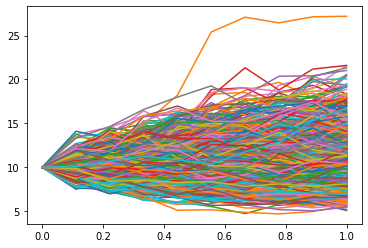

In [145]:
N_mc= 1000# Number of simulations / trajectories
N = 10 # Number of timesteps in each trajectory
T = 1 #maturity time
S_0,r,sigma,mu, K = 10, 0.1, 0.3,0.5, 5
dt= float(T)/N; 

time_steps = np.linspace(0,T,N) # time_steps
dW= np.sqrt(dt)*np.random.randn(N_mc,N)
W_paths=np.cumsum(dW,1)

#===== Generate simulated prices for a GBM ==========
S_values = np.zeros([N_mc,N])
S_values[:,0] = S_0

for i in range(1,len(time_steps)):
    S_values[:,i] = S_values[:,i-1]* np.exp((r- mu* sigma**2)* dt + sigma * dW[:,i])

#generate plot
for i in range(N_mc):
    sns.lineplot(x= time_steps, y= S_values[i,:])

#S_values

In [77]:

S_values|

array([[10.        ,  9.68279085,  9.96073504, 11.50577841, 10.18127407,
        10.60203733, 10.24250018, 10.81913443, 12.33093747, 13.55077036],
       [10.        ,  8.84017587,  9.07510528,  9.56510901, 11.79720791,
        12.10160407, 11.4536666 , 12.51300653, 14.71855914, 14.95649989],
       [10.        , 11.38729662, 11.88031389, 12.54837139, 10.994019  ,
        10.17451052,  9.74289282,  9.90061259, 10.25875554, 12.37976349],
       [10.        ,  9.90993238, 10.24841648, 10.60857881, 10.00510399,
         9.42448595, 10.14046269, 10.10134752,  9.66726625, 11.26943962],
       [10.        , 10.26394323, 10.49671851, 11.21206689, 11.01782575,
        12.84048507, 12.4110784 , 11.6935746 , 12.01914571, 12.0331023 ]])

In [76]:
for i in range(len(time_steps)-1,-1,-1):
    print(S_values[:,i])

[13.55077036 14.95649989 12.37976349 11.26943962 12.0331023 ]
[12.33093747 14.71855914 10.25875554  9.66726625 12.01914571]
[10.81913443 12.51300653  9.90061259 10.10134752 11.6935746 ]
[10.24250018 11.4536666   9.74289282 10.14046269 12.4110784 ]
[10.60203733 12.10160407 10.17451052  9.42448595 12.84048507]
[10.18127407 11.79720791 10.994019   10.00510399 11.01782575]
[11.50577841  9.56510901 12.54837139 10.60857881 11.21206689]
[ 9.96073504  9.07510528 11.88031389 10.24841648 10.49671851]
[ 9.68279085  8.84017587 11.38729662  9.90993238 10.26394323]
[10. 10. 10. 10. 10.]


In [140]:
#print(Y[:,-1])
#dW[:,-1]
print(np.mean(S_values[:,-1])-K)
Y_N

5.9229308720444696


16.098459687601487

In [141]:
#===== Generate simulated prices for a GBM ==========
#Payoff
S_T = np.mean(S_values[:,-1]) #montecarlo average of final prices
Y_N = np.max(S_T - K ,0) #call option payoff

Y = np.zeros([N_mc,N])
Z = np.zeros([N_mc,N])
Y[:,-1] = Y_N
Y

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 5.92293087],
       [0.        , 0.        , 0.       

In [146]:
#===== Generate simulated prices for a GBM ==========
#Payoff
S_T = np.mean(S_values[:,-1]) #montecarlo average of final prices
Y_N = np.max(S_T - K ,0) #call option payoff

Y = np.zeros([N_mc,N])
Z = np.zeros([N_mc,N])
Y[:,-1] = Y_N
hermite_order = 2

for i in range(len(time_steps)-1,0,-1):

    coef_Z = coeffsForCondiExp(S_values[:,i],Y[:,i] * dW[:,i],hermite_order)
    Z_hat = approxCondExp(S_values[:,i],coef_Z) * (1/dt)
    Z[:,i-1] = Z_hat

    g = r * Y[:,i] + (1/sigma) * (mu-r) * Z[:,i-1]
    coef_Y =  coeffsForCondiExp(S_values[:,i],Y[:,i] - g * dt,hermite_order)
    Y_hat = approxCondExp(S_values[:,i],coef_Y)
    Y[:,i-1] = Y_hat
    #print("Y ==", Y)

#print(Z)
#Y
# Evaulate conditional expectation
price_hat = np.mean(Y[:,0])
price_hat


11.878480825164267

In [112]:
Y[:,-1]

array([40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55268044,
       40.55268044, 40.55268044, 40.55268044, 40.55268044, 40.55

In [143]:
from scipy.stats import norm

def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2.)*T)/sigma* np.sqrt(T)
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma* np.sqrt(T)

BSM_price = S_0*norm.cdf(d1(S_0,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S_0,K,T,r,sigma))

BSM_price

5.4783557500064735

In [83]:
Y = np.zeros([N_mc,N])
Y[:,-1] = Y_N
#Y
print(dW)
W_paths

[[ 0.58251539 -0.12578307  0.07600232  0.46232837 -0.42599741  0.11665342
  -0.13333478  0.16423508  0.41765024  0.29610684]
 [-0.38915194 -0.42926107  0.06909403  0.15695673  0.68080295  0.06658375
  -0.20176035  0.27652907  0.52280199  0.03512252]
 [ 0.34208017  0.41471103  0.12294778  0.16402718 -0.45913163 -0.27655258
  -0.16282515  0.03519518  0.10011635  0.60810541]
 [ 0.15036747 -0.04849189  0.09361893  0.09679931 -0.21355878 -0.2176139
   0.22574145 -0.03121598 -0.16474423  0.49283013]
 [-0.51794707  0.06850668  0.05641863  0.20142638 -0.07658705  0.49196197
  -0.13171194 -0.21683327  0.07320448 -0.01446492]]


array([[ 0.58251539,  0.45673232,  0.53273464,  0.99506301,  0.56906561,
         0.68571903,  0.55238424,  0.71661932,  1.13426957,  1.43037641],
       [-0.38915194, -0.81841301, -0.74931897, -0.59236225,  0.08844071,
         0.15502446, -0.04673589,  0.22979317,  0.75259517,  0.78771769],
       [ 0.34208017,  0.7567912 ,  0.87973898,  1.04376615,  0.58463452,
         0.30808194,  0.14525679,  0.18045197,  0.28056833,  0.88867374],
       [ 0.15036747,  0.10187558,  0.19549451,  0.29229381,  0.07873503,
        -0.13887887,  0.08686258,  0.0556466 , -0.10909762,  0.38373251],
       [-0.51794707, -0.44944039, -0.39302176, -0.19159538, -0.26818244,
         0.22377954,  0.09206759, -0.12476568, -0.0515612 , -0.06602612]])

In [84]:
W_paths[0][3] - W_paths[0][2]

W_paths
1.43037641-1.13426957

0.29610684

Error at endpoint:  0.054908958810648834


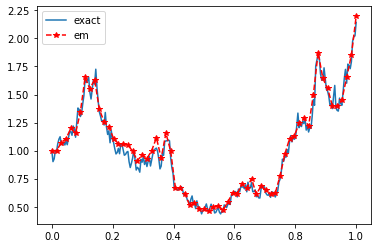

In [ ]:
# From the NPMC Solving paper:
#EM Euler-Maruyama method on a linear SDE
#
# SDE is dX = gamma*X dt + mu*X dW,  X(0) = Xzero
#      where gamma = 2, mu = 1, and Xzero = 1
#
# Discretized Brownian path over [0,1] has dt = 2^(-8).
# Euler-Maruyama uses timestep R*dt
#
# Adapted from 
# Desmond J. Higham "An Algorithmic Introduction to Numerical Simulation of 
#                    Stochastic Differential Equations"
#
# http://www.caam.rice.edu/~cox/stoch/dhigham.pdf

import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(100)

gamma=2; mu=1; Xzero=1
T=1; N=2**8; 
dt = float(T)/N
t=np.linspace(0,T,N+1)

dW=np.sqrt(dt)*np.random.randn(1,N)
W = np.cumsum(dW)

# Calculate the true trajectory analytically
Xtrue  = Xzero*np.exp((gamma-0.5*mu**2)*t[1:]+mu*W); 
# Insert a  zero so that the brownian starts at 0
Xtrue = np.insert(Xtrue,0,Xzero)
ax=plt.subplot(111)
ax.plot(t,Xtrue)

#Simulation
R=4; Dt=R*dt; L= N /R
# Prepare simulation output array
Xem=np.zeros(math.floor(L) + 1) 
Xem[0] = Xzero

for j in range(1, math.floor(L)+1):
    Winc=np.sum(dW[0][range(R*(j-1),R*j)])
    Xem[j] = Xem[j-1] + Dt*gamma*Xem[j-1] + mu*Xem[j-1]*Winc

emerr=np.abs(Xem[-1]-Xtrue[-1])
print ("Error at endpoint: ", emerr)

ax.plot(np.linspace(0, T, int(L)+1), Xem, 'r--*')
ax.legend(("exact","em"),loc=2)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f035995c-05fa-4d78-a3eb-ad35f9416ab7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>